In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
from keras import regularizers

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
notMNIST = np.load('notMNIST_train_100.npz')

images = notMNIST['train_images']
labels = notMNIST['train_labels']

label_names = np.array(['A','B','C','D','E','F','G','H','I','J'])
pd.Series(label_names[labels]).value_counts()

D    20
J    14
G    14
I    12
E     9
A     8
C     7
H     7
B     5
F     4
dtype: int64

In [3]:
images.shape

(100, 28, 28)

In [4]:
X = images.reshape(100,28*28)
X.shape

(100, 784)

In [5]:
Y = pd.get_dummies(labels).values
Y

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0,

In [6]:
model = Sequential()
model.add(Dense(10,input_shape=(28*28,),kernel_regularizer=regularizers.l2(10)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist = model.fit(X,Y,epochs=200,verbose=1,validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/200
80/80 [==============================] - 1s 8ms/step - loss: 195.8909 - acc: 0.1000 - val_loss: 181.3040 - val_acc: 0.1000
Epoch 2/200
80/80 [==============================] - 0s 190us/step - loss: 176.4276 - acc: 0.1125 - val_loss: 162.9029 - val_acc: 0.1000
Epoch 3/200
80/80 [==============================] - 0s 213us/step - loss: 158.4055 - acc: 0.1125 - val_loss: 145.9325 - val_acc: 0.1000
Epoch 4/200
80/80 [==============================] - 0s 224us/step - loss: 141.8023 - acc: 0.1125 - val_loss: 130.3605 - val_acc: 0.1000
Epoch 5/200
80/80 [==============================] - 0s 212us/step - loss: 126.5859 - acc: 0.1250 - val_loss: 116.1404 - val_acc: 0.1000
Epoch 6/200
80/80 [==============================] - 0s 212us/step - loss: 112.7044 - acc: 0.1250 - val_loss: 103.2136 - val_acc: 0.1000
Epoch 7/200
80/80 [==============================] - 0s 227us/step - loss: 100.0971 - acc: 0.1375 - val_loss: 91.5113 - val_acc: 0.1000


80/80 [==============================] - 0s 187us/step - loss: 2.1228 - acc: 0.5500 - val_loss: 2.3239 - val_acc: 0.1500
Epoch 62/200
80/80 [==============================] - 0s 206us/step - loss: 2.1225 - acc: 0.5375 - val_loss: 2.3228 - val_acc: 0.1500
Epoch 63/200
80/80 [==============================] - 0s 237us/step - loss: 2.1207 - acc: 0.5375 - val_loss: 2.3175 - val_acc: 0.1500
Epoch 64/200
80/80 [==============================] - 0s 186us/step - loss: 2.1195 - acc: 0.5500 - val_loss: 2.3145 - val_acc: 0.1500
Epoch 65/200
80/80 [==============================] - 0s 174us/step - loss: 2.1189 - acc: 0.5500 - val_loss: 2.3152 - val_acc: 0.2000
Epoch 66/200
80/80 [==============================] - 0s 174us/step - loss: 2.1199 - acc: 0.5500 - val_loss: 2.3181 - val_acc: 0.2000
Epoch 67/200
80/80 [==============================] - 0s 201us/step - loss: 2.1194 - acc: 0.5500 - val_loss: 2.3178 - val_acc: 0.2000
Epoch 68/200
80/80 [==============================] - 0s 201us/step - loss:

80/80 [==============================] - 0s 226us/step - loss: 2.0949 - acc: 0.5000 - val_loss: 2.3240 - val_acc: 0.1500
Epoch 123/200
80/80 [==============================] - 0s 187us/step - loss: 2.0938 - acc: 0.5125 - val_loss: 2.3208 - val_acc: 0.1500
Epoch 124/200
80/80 [==============================] - 0s 199us/step - loss: 2.0939 - acc: 0.5125 - val_loss: 2.3200 - val_acc: 0.1500
Epoch 125/200
80/80 [==============================] - 0s 199us/step - loss: 2.0933 - acc: 0.5125 - val_loss: 2.3171 - val_acc: 0.1500
Epoch 126/200
80/80 [==============================] - 0s 215us/step - loss: 2.0929 - acc: 0.5125 - val_loss: 2.3189 - val_acc: 0.1500
Epoch 127/200
80/80 [==============================] - 0s 199us/step - loss: 2.0924 - acc: 0.5125 - val_loss: 2.3193 - val_acc: 0.1500
Epoch 128/200
80/80 [==============================] - 0s 219us/step - loss: 2.0923 - acc: 0.5250 - val_loss: 2.3213 - val_acc: 0.1500
Epoch 129/200
80/80 [==============================] - 0s 223us/step 

Epoch 183/200
80/80 [==============================] - 0s 199us/step - loss: 2.0786 - acc: 0.5125 - val_loss: 2.3274 - val_acc: 0.1500
Epoch 184/200
80/80 [==============================] - 0s 182us/step - loss: 2.0779 - acc: 0.5125 - val_loss: 2.3277 - val_acc: 0.1500
Epoch 185/200
80/80 [==============================] - 0s 199us/step - loss: 2.0765 - acc: 0.5125 - val_loss: 2.3298 - val_acc: 0.1500
Epoch 186/200
80/80 [==============================] - 0s 197us/step - loss: 2.0778 - acc: 0.5125 - val_loss: 2.3300 - val_acc: 0.2000
Epoch 187/200
80/80 [==============================] - 0s 175us/step - loss: 2.0762 - acc: 0.5125 - val_loss: 2.3334 - val_acc: 0.1500
Epoch 188/200
80/80 [==============================] - 0s 174us/step - loss: 2.0762 - acc: 0.5250 - val_loss: 2.3350 - val_acc: 0.1500
Epoch 189/200
80/80 [==============================] - 0s 200us/step - loss: 2.0759 - acc: 0.5125 - val_loss: 2.3373 - val_acc: 0.1500
Epoch 190/200
80/80 [==============================] - 

In [7]:
accuracy = pd.DataFrame()
accuracy['epoch'] = hist.epoch
accuracy['epoch'] = accuracy['epoch']+1
accuracy['training'] = hist.history['acc']
accuracy['testing'] = hist.history['val_acc']
accuracy['baseline'] = Y.std()
accuracy.head()

,epoch,training,testing,baseline
0,1,0.1000,0.1,0.3
1,2,0.1125,0.1,0.3
2,3,0.1125,0.1,0.3
3,4,0.1125,0.1,0.3
4,5,0.1250,0.1,0.3


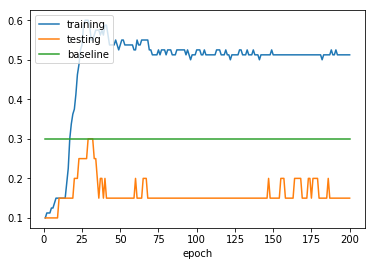

In [8]:
ax = accuracy.plot.line(x='epoch',y='training')
ax = accuracy.plot.line(x='epoch',y='testing',ax=ax)
accuracy.plot.line(x='epoch',y='baseline',ax=ax)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
